In [22]:
accidents = read.csv(file = "../../data/Accident_Information_London_C.csv",
                     header = TRUE,
                     sep = ",",
stringsAsFactors = FALSE)

In [23]:
colnames(accidents)
lapply(accidents, class)

[1] "Accident_Index"                         
 [2] "Accident_Severity"                      
 [3] "Date"                                   
 [4] "Day_of_Week"                            
 [5] "Light_Conditions"                       
 [6] "Number_of_Casualties"                   
 [7] "Number_of_Vehicles"                     
 [8] "Pedestrian_Crossing_Human_Control"      
 [9] "Pedestrian_Crossing_Physical_Facilities"
[10] "Police_Force"                           
[11] "Road_Surface_Conditions"                
[12] "Road_Type"                              
[13] "Special_Conditions_at_Site"             
[14] "Speed_limit"                            
[15] "Time"                                   
[16] "Urban_or_Rural_Area"                    
[17] "Weather_Conditions"                     
[18] "Year"

$Accident_Index
[1] "character"

$Accident_Severity
[1] "character"

$Date
[1] "character"

$Day_of_Week
[1] "character"

$Light_Conditions
[1] "character"

$Number_of_Casualties
[1] "integer"

$Number_of_Vehicles
[1] "integer"

$Pedestrian_Crossing_Human_Control
[1] "integer"

$Pedestrian_Crossing_Physical_Facilities
[1] "integer"

$Police_Force
[1] "character"

$Road_Surface_Conditions
[1] "character"

$Road_Type
[1] "character"

$Special_Conditions_at_Site
[1] "character"

$Speed_limit
[1] "integer"

$Time
[1] "character"

$Urban_or_Rural_Area
[1] "character"

$Weather_Conditions
[1] "character"

$Year
[1] "integer"

In [54]:
cols1 <- c("Accident_Severity","Date","Day_of_Week","Light_Conditions", "Number_of_Casualties", "Number_of_Vehicles", "Road_Surface_Conditions", "Road_Type","Special_Conditions_at_Site", "Speed_limit", "Weather_Conditions", "Pedestrian_Crossing_Physical_Facilities")

cols2 <- c("Accident_Severity","Date","Day_of_Week", "Number_of_Casualties", "Road_Surface_Conditions", "Road_Type","Special_Conditions_at_Site", "Speed_limit", "Weather_Conditions")

In [52]:
head(accidents)

Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
200501CP00001,Slight,2005-01-01,Saturday,Darkness - lights lit,1,2,0,5,City of London,Dry,Single carriageway,None,30,22:50:00,Urban,Fine no high winds,2005
200501CP00002,Slight,2005-01-02,Sunday,Darkness - lights lit,1,2,0,0,City of London,Dry,Single carriageway,None,30,20:50:00,Urban,Fine no high winds,2005
200501CP00003,Slight,2005-01-02,Sunday,Daylight,1,3,0,5,City of London,Dry,Single carriageway,None,30,10:02:00,Urban,Fine no high winds,2005
200501CP00004,Slight,2005-01-08,Saturday,Darkness - lights lit,3,2,0,5,City of London,Wet or damp,One way street,None,30,02:45:00,Urban,Raining no high winds,2005
200501CP00005,Slight,2005-01-04,Tuesday,Daylight,1,1,0,5,City of London,Dry,Dual carriageway,None,30,12:30:00,Urban,Fine no high winds,2005
200501CP00006,Serious,2005-01-07,Friday,Darkness - lights lit,1,2,0,5,City of London,Dry,Roundabout,None,30,18:05:00,Urban,Fine no high winds,2005


In [27]:
a = accidents
unique(accidents$Accident_Severity)
a$Accident_Severity = factor(accidents$Accident_Severity, levels = c("Slight", "Serious", "Fatal"),
                             labels = c(3, 2, 1))
unique(a$Accident_Severity)

[1] "Slight"  "Serious" "Fatal"

[1] 3 2 1
Levels: 3 2 1

In [28]:
#transform Date into 4 seasons
#unique(accidents$Date)
a$Date = sapply(strsplit(accidents$Date,"-"),
                function(x) {
                  x <- as.numeric(x)
                  x[2]
                }
)
a$Date = factor(a$Date, levels = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
                labels = c("Winter", "Winter", "Spring", "Spring", "Spring", "Summer", "Summer", "Summer", "Autumn", "Autumn", "Autumn", "Winter"))
unique(a$Date)


[1] Winter Spring Summer Autumn
Levels: Winter Spring Summer Autumn

In [29]:
unique(accidents$Day_of_Week)
a$Day_of_Week = factor(accidents$Day_of_Week, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"),
                       labels = c("Weekday", "Weekday", "Weekday", "Weekday", "Weekday", "Weekend", "Weekend")) #labels = c(1, 2, 3, 4, 5, 6, 7))
unique(a$Day_of_Week)

[1] "Saturday"  "Sunday"    "Tuesday"   "Friday"    "Monday"    "Wednesday"
[7] "Thursday"

[1] Weekend Weekday
Levels: Weekday Weekend

In [30]:
unique(accidents$Road_Surface_Conditions)
a$Road_Surface_Conditions = factor(accidents$Road_Surface_Conditions, levels = c("Data missing or out of range", "Dry", "Wet or damp", "Frost or ice", "Snow"),
                                   labels = c("Data missing or out of range", "Dry", "Wet or damp", "Frost or ice", "Snow"))
unique(a$Road_Surface_Conditions)


[1] "Dry"                          "Wet or damp"                 
[3] "Frost or ice"                 "Snow"                        
[5] "Data missing or out of range"

[1] Dry                          Wet or damp                 
[3] Frost or ice                 Snow                        
[5] Data missing or out of range
Levels: Data missing or out of range Dry Wet or damp Frost or ice Snow

In [31]:
unique(accidents$Time)
a$Time = sapply(strsplit(accidents$Time,":"),
                function(x) {
                  x <- as.numeric(x)
                  x[1]+x[2]/60
                }
)
# Midnight - 6am = Night; 6am - Noon = Morning; Noon - 6pm = afternoon; 6pm - Midnight = evening
a$Time = cut(a$Time, breaks=4, labels=c("Night", "Morning", "Afternoon", "Evening"))
unique(a$Time)

[1] "22:50:00" "20:50:00" "10:02:00" "02:45:00" "12:30:00" "18:05:00"
   [7] "10:00:00" "15:00:00" "11:59:00" "14:22:00" "12:25:00" "07:30:00"
  [13] "00:30:00" "14:35:00" "17:45:00" "22:30:00" "15:30:00" "04:52:00"
  [19] "23:20:00" "16:00:00" "18:50:00" "08:25:00" "16:20:00" "21:00:00"
  [25] "13:05:00" "08:30:00" "09:20:00" "11:15:00" "19:05:00" "07:25:00"
  [31] "11:40:00" "15:10:00" "13:31:00" "13:00:00" "15:45:00" "10:05:00"
  [37] "22:26:00" "15:15:00" "21:15:00" "18:00:00" "10:41:00" "17:00:00"
  [43] "11:26:00" "06:35:00" "07:13:00" "09:45:00" "19:30:00" "07:15:00"
  [49] "17:15:00" "12:05:00" "10:59:00" "18:15:00" "06:58:00" "16:52:00"
  [55] "14:30:00" "16:55:00" "14:00:00" "15:33:00" "08:40:00" "06:50:00"
  [61] "13:30:00" "09:05:00" "12:55:00" "13:45:00" "09:55:00" "14:45:00"
  [67] "15:40:00" "16:17:00" "09:08:00" "12:26:00" "22:10:00" "08:50:00"
  [73] "09:00:00" "18:30:00" "18:57:00" "12:50:00" "16:50:00" "16:28:00"
  [79] "13:40:00" "04:07:00" "07:50:00" "17:50:00" "23:37:00" "08:45:00"
  [85] "18:10:00" "16:26:00" "23:45:00" "00:40:00" "13:44:00" "00:04:00"
  [91] "17:20:00" "17:10:00" "17:29:00" "13:46:00" "08:00:00" "13:15:00"
  [97] "22:37:00" "10:35:00" "13:52:00" "16:29:00" "23:00:00" "08:36:00"
 [103] "13:35:00" "15:05:00" "17:25:00" "11:22:00" "16:40:00" "11:20:00"
 [109] "11:00:00" "11:05:00" "21:09:00" "09:35:00" "00:33:00" "17:40:00"
 [115] "07:55:00" "09:57:00" "16:46:00" "19:23:00" "10:15:00" "10:45:00"
 [121] "14:39:00" "09:50:00" "14:15:00" "20:20:00" "08:55:00" "09:22:00"
 [127] "09:52:00" "14:40:00" "12:40:00" "06:40:00" "18:20:00" "11:34:00"
 [133] "01:00:00" "04:40:00" "12:58:00" "18:21:00" "22:36:00" "22:07:00"
 [139] "20:56:00" "08:27:00" "18:27:00" "13:21:00" "10:22:00" "18:45:00"
 [145] "08:05:00" "23:33:00" "10:30:00" "18:22:00" "03:40:00" "07:03:00"
 [151] "15:35:00" "20:34:00" "22:11:00" "18:35:00" "14:08:00" "16:45:00"
 [157] "16:32:00" "17:33:00" "10:39:00" "18:31:00" "17:17:00" "08:43:00"
 [163] "17:23:00" "19:40:00" "21:17:00" "15:53:00" "06:25:00" "10:01:00"
 [169] "13:50:00" "16:30:00" "21:25:00" "18:25:00" "19:15:00" "22:31:00"
 [175] "08:35:00" "14:05:00" "11:52:00" "13:39:00" "12:04:00" "09:32:00"
 [181] "22:20:00" "14:31:00" "15:25:00" "01:21:00" "21:45:00" "09:14:00"
 [187] "08:26:00" "07:10:00" "23:15:00" "09:02:00" "17:55:00" "00:10:00"
 [193] "09:15:00" "07:21:00" "14:20:00" "05:05:00" "16:39:00" "10:55:00"
 [199] "21:42:00" "23:30:00" "08:20:00" "12:00:00" "07:35:00" "13:02:00"
 [205] "00:15:00" "02:50:00" "02:38:00" "20:38:00" "15:50:00" "16:41:00"
 [211] "09:30:00" "19:18:00" "13:10:00" "13:25:00" "21:30:00" "16:15:00"
 [217] "17:41:00" "18:13:00" "09:21:00" "18:55:00" "15:26:00" "03:28:00"
 [223] "19:00:00" "17:59:00" "13:59:00" "00:52:00" "09:06:00" "22:00:00"
 [229] "20:05:00" "07:53:00" "10:07:00" "20:10:00" "06:10:00" "19:50:00"
 [235] "16:25:00" "19:24:00" "15:34:00" "23:12:00" "14:25:00" "16:35:00"
 [241] "13:20:00" "21:55:00" "12:22:00" "10:13:00" "09:44:00" "12:54:00"
 [247] "22:15:00" "20:30:00" "23:53:00" "03:30:00" "08:49:00" "15:22:00"
 [253] "17:30:00" "11:30:00" "06:52:00" "18:01:00" "12:07:00" "18:08:00"
 [259] "11:25:00" "18:24:00" "22:54:00" "06:45:00" "15:29:00" "17:24:00"
 [265] "14:11:00" "08:10:00" "09:33:00" "08:24:00" "16:43:00" "12:15:00"
 [271] "23:59:00" "19:43:00" "07:56:00" "19:47:00" "15:03:00" "20:00:00"
 [277] "16:54:00" "01:26:00" "01:57:00" "09:25:00" "14:28:00" "04:38:00"
 [283] "22:02:00" "04:45:00" "07:05:00" "14:50:00" "09:39:00" "08:29:00"
 [289] "09:11:00" "10:50:00" "10:10:00" "22:46:00" "01:20:00" "09:40:00"
 [295] "02:59:00" "05:06:00" "14:23:00" "02:35:00" "23:49:00" "11:57:00"
 [301] "21:07:00" "20:02:00" "12:52:00" "11:07:00" "23:40:00" "13:24:00"
 [307] "23:35:00" "19:20:00" "05:55:00" "09:01:00" "13:58:00" "19:12:00"
 [313] "04:30:00" "16:19:00" "13:32:00" "13:55:00" "15:42:00" "14:10:00"
 [319] "21:20:00" "22:40:00" "10:23:00" "08:21:00" "08:15:00" "10:04:00"
 [325] "07:31:00" "16:49:00" "01:48:00" "10:51:00" "08:08:00"

[1] Evening   Morning   Night     Afternoon
Levels: Night Morning Afternoon Evening

In [32]:
unique(accidents$Weather_Conditions)
a$Weather_Conditions = factor(accidents$Weather_Conditions, levels = c("Unknown", "Other", "Fine no high winds", "Fine + high winds", "Raining no high winds", "Raining + high winds", "Snowing no high winds", "Fog or mist"),
                              labels = c("Unknown", "Unknown", "Fine", "Fine", "Bad", "Bad", "Bad", "Bad")) #labels = c(0, 1, 2, 3, 4, 5, 6, 7))
unique(a$Weather_Conditions)

[1] "Fine no high winds"    "Raining no high winds" "Snowing no high winds"
[4] "Other"                 "Unknown"               "Raining + high winds" 
[7] "Fine + high winds"     "Fog or mist"

[1] Fine    Bad     Unknown
Levels: Unknown Fine Bad

In [33]:
#transform Special_Conditions_at_Site into none and special
unique(accidents$Special_Conditions_at_Site)
a$Special_Conditions_at_Site = factor(accidents$Special_Conditions_at_Site, levels = c("Data missing or out of range", "None", "Road surface defective", "Roadworks", "Auto traffic signal - out", "Oil or diesel", "Auto signal part defective", "Road sign or marking defective or obscured"),
                                      labels = c("None", "None","Special", "Special", "Special", "Special", "Special", "Special")) #labels = c(0, 1, 2, 3, 4, 5, 6, 7))
unique(a$Special_Conditions_at_Site)

[1] "None"                                      
[2] "Road surface defective"                    
[3] "Roadworks"                                 
[4] "Auto traffic signal - out"                 
[5] "Oil or diesel"                             
[6] "Auto signal part defective"                
[7] "Road sign or marking defective or obscured"
[8] "Data missing or out of range"

[1] None    Special
Levels: None Special

In [34]:
unique(accidents$Road_Type)
a$Road_Type = factor(accidents$Road_Type, levels = c("Unknown", "Single carriageway", "Dual carriageway", "One way street", "Roundabout", "Slip road"),
                     labels = c("Unknown", "Single carriageway", "Dual carriageway", "One way street", "Roundabout", "Slip road")) 
unique(a$Road_Type)

[1] "Single carriageway" "One way street"     "Dual carriageway"  
[4] "Roundabout"         "Slip road"          "Unknown"

[1] Single carriageway One way street     Dual carriageway   Roundabout        
[5] Slip road          Unknown           
6 Levels: Unknown Single carriageway Dual carriageway ... Slip road

In [35]:
#transform Light_Conditions into daylight and darkness
unique(accidents$Light_Conditions)
a$Light_Conditions = factor(accidents$Light_Conditions, levels = c("Daylight", "Darkness - lights lit", "Darkness - lighting unknown", "Darkness - lights unlit"),
                            #labels = c("Daylight", "Darkness", "Darkness", "Darkness")) #labels = c(1, 2, 3, 4))
                            labels = c("Daylight", "Darkness - lights lit", "Darkness - lighting unknown", "Darkness - lights unlit")) #labels = c(1, 2, 3, 4))
unique(a$Light_Conditions)

[1] "Darkness - lights lit"       "Daylight"                   
[3] "Darkness - lights unlit"     "Darkness - lighting unknown"

[1] Darkness - lights lit       Daylight                   
[3] Darkness - lights unlit     Darkness - lighting unknown
4 Levels: Daylight Darkness - lights lit ... Darkness - lights unlit

In [55]:
b = subset(a,select=cols2)

In [72]:

library(dplyr)
library(cluster)
library(ggplot2) 


#compute the distance matrix using ‘gower’
#gower_dist <- daisy(b[, -1], metric = "gower", type = list(logratio = 3))
gower_dist <- daisy(b[, -1], metric = "gower")
summary(gower_dist)
gower_mat <- as.matrix(gower_dist)

8337486 dissimilarities, summarized :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1250  0.2500  0.2444  0.3750  0.8750 
Metric :  mixed ;  Types = N, N, I, N, N, N, I, N 
Number of objects : 4084

In [76]:
# number of cluster PAM
sil <- c(NA)
for(i in 2:10){
  pam_fit <- pam(gower_mat, diss=TRUE, k=i)
  sil[i] <-pam_fit$silinfo$avg.width
}



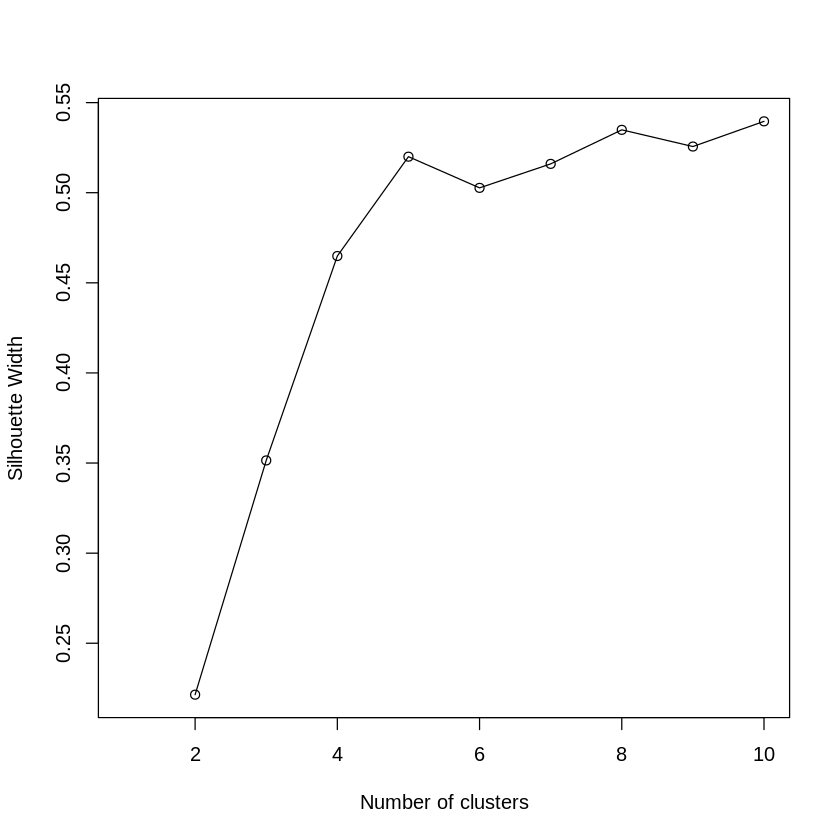

In [77]:
plot(1:10, sil,
     xlab = "Number of clusters",
     ylab = "Silhouette Width")
lines(1:10, sil)

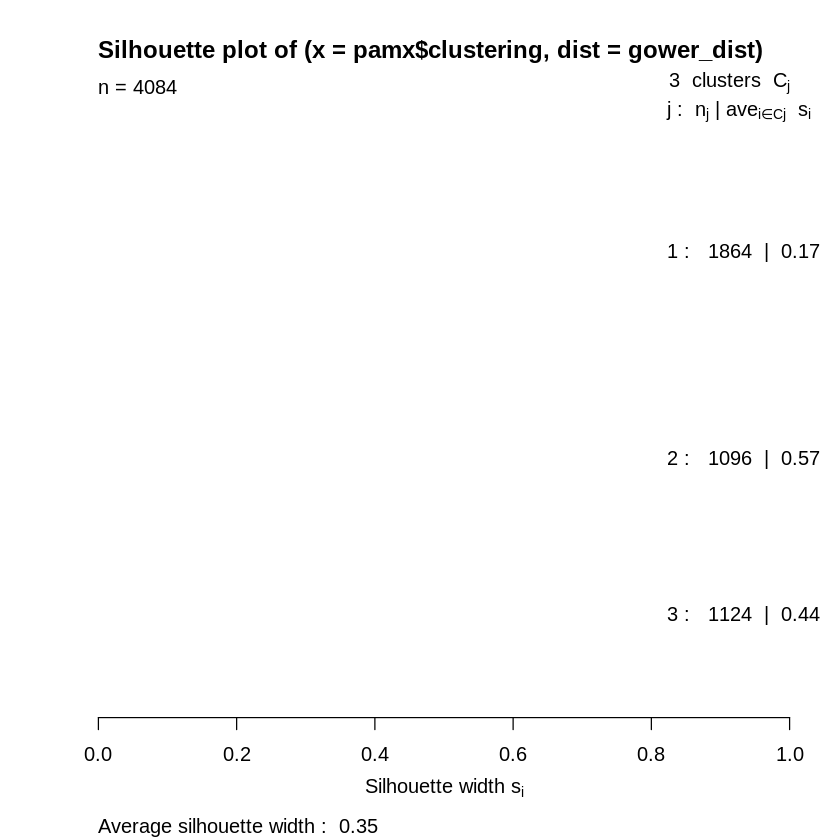

In [75]:
pamx <- pam(gower_dist, 3)
sil = silhouette (pamx$clustering, gower_dist)
plot(sil)

In [59]:
#Cluster Interpretation k=6
pam_fit <- pam(gower_dist, diss = TRUE, k = 8)


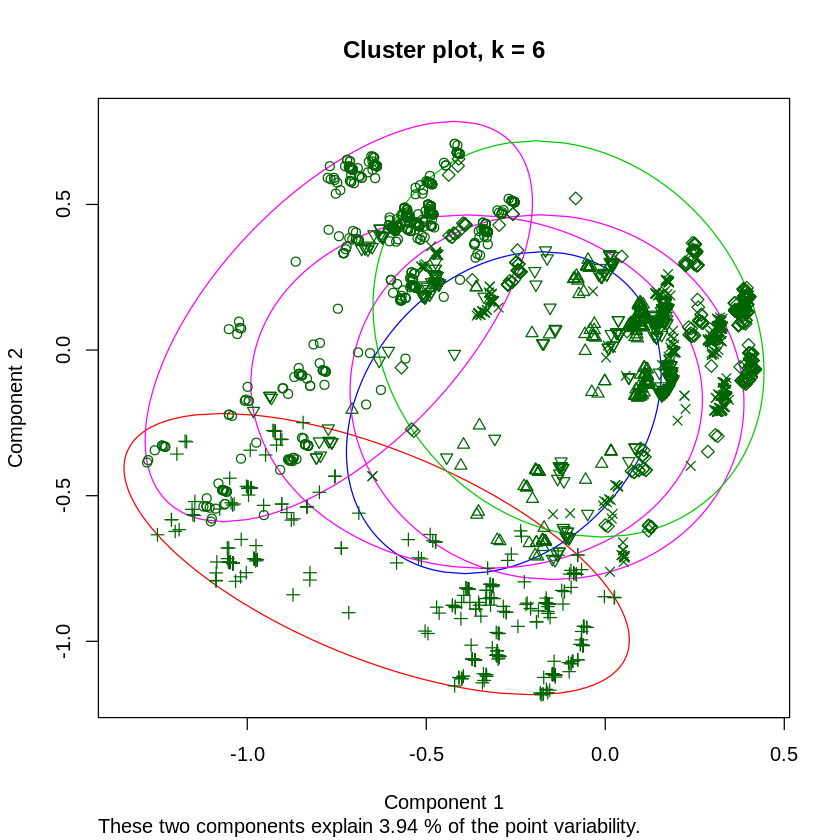

In [40]:
clusplot(pam_fit, main = "Cluster plot, k = 8", 
         color = TRUE)

In [41]:
c <- data.frame(b, pam_fit$cluster)

pam_results <- b %>%
  mutate(cluster = pam_fit$clustering) %>%
  group_by(cluster) %>%
  do(the_summary = summary(.))
pam_results$the_summary


[[1]]
 Accident_Severity     Date      Day_of_Week 
 3:587             Winter:367   Weekday:519  
 2: 90             Spring: 80   Weekend:161  
 1:  3             Summer: 56                
                   Autumn:177                
                                             
                                             
                    Light_Conditions Number_of_Casualties Number_of_Vehicles
 Daylight                   :  0     Min.   :1.000        Min.   :1.00      
 Darkness - lights lit      :679     1st Qu.:1.000        1st Qu.:1.00      
 Darkness - lighting unknown:  0     Median :1.000        Median :2.00      
 Darkness - lights unlit    :  1     Mean   :1.174        Mean   :1.61      
                                     3rd Qu.:1.000        3rd Qu.:2.00      
                                     Max.   :5.000        Max.   :4.00      
                 Road_Surface_Conditions              Road_Type  
 Data missing or out of range:  0        Unknown           :  0  
 

In [42]:
install.packages("Rtsne")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [60]:
library(Rtsne)
# Cluster Visualization #
#########################
tsne_obj <- Rtsne(gower_dist, is_distance = TRUE)


X,Y,cluster,id
9.056096,4.964550,1,200501CP00001
9.056918,4.964494,1,200501CP00002
9.057239,4.965055,1,200501CP00003
-6.487667,32.852790,2,200501CP00004
16.003961,2.425334,3,200501CP00005
14.154031,-1.154051,1,200501CP00006


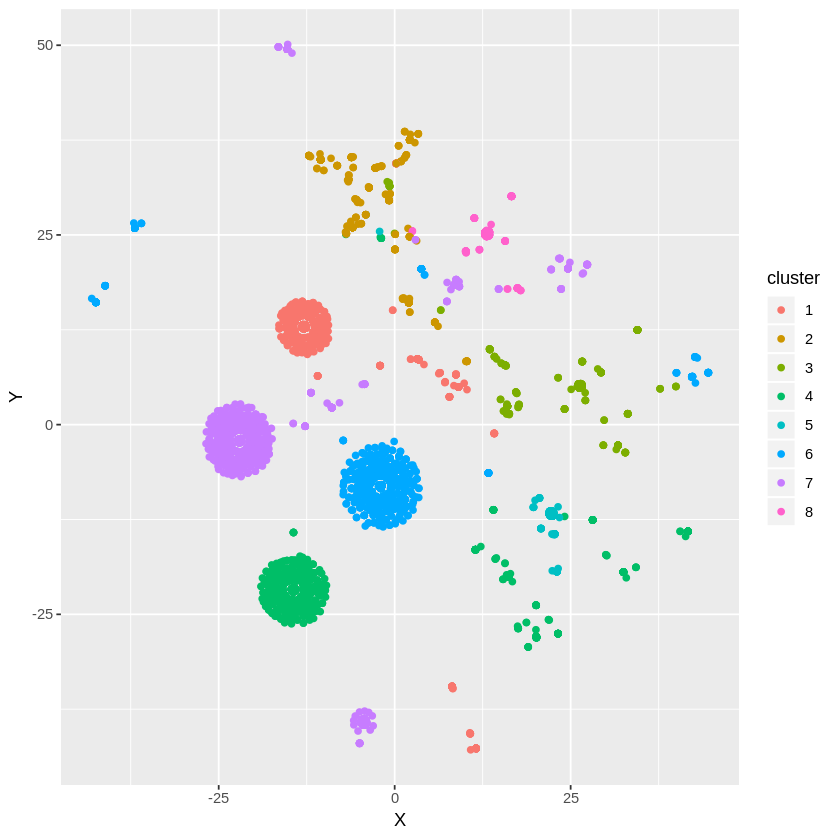

In [61]:
#visualize clusters for k=6
tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("X", "Y")) %>%
  mutate(cluster = factor(pam_fit$clustering),
         id = a$Accident_Index)

head(tsne_data)
colnames(tsne_data)[3] = "cluster"

ggplot(aes(x = X, y = Y), data = tsne_data) + geom_point(aes(color = cluster))

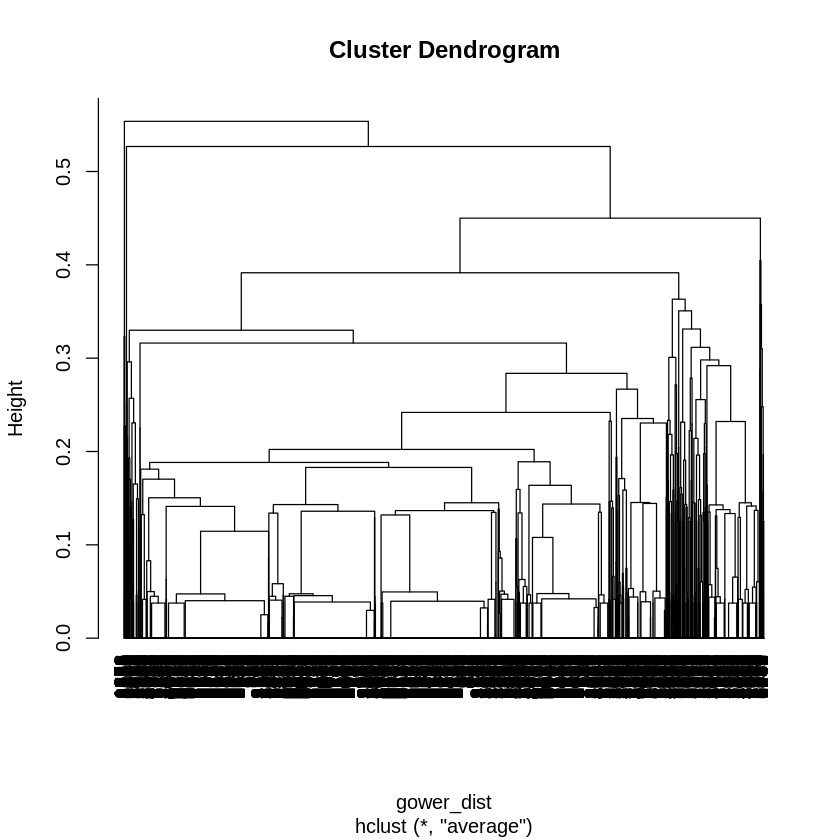

In [63]:
#######################
# Hierarchical method # 
#######################
h <- hclust(gower_dist, method="average")
plot(h, hang=-0.1)
clus6 <- cutree(h, 8)

In [65]:
library(cluster)

# compare DIANA results to PAM
d <- diana(gower_dist)
d6 <- cutree(d, 8)

In [67]:
# examine results in each class
t_c1 <- which(d6 %in% c(1))
a[t_c1,]
t_c2 <- which(d6 %in% c(2))
a[t_c2,]
t_c3 <- which(d6 %in% c(3))
a[t_c3,]
t_c4 <- which(d6 %in% c(4))
a[t_c4,]
t_c5 <- which(d6 %in% c(5))
a[t_c5,]
t_c6 <- which(d6 %in% c(6))
a[t_c6,]
t_c7 <- which(d6 %in% c(7))
a[t_c7,]
t_c8 <- which(d6 %in% c(8))
a[t_c8,]

,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
1,200501CP00001,3,Winter,Weekend,Darkness - lights lit,1,2,0,5,City of London,Dry,Single carriageway,None,30,Evening,Urban,Fine,2005
2,200501CP00002,3,Winter,Weekend,Darkness - lights lit,1,2,0,0,City of London,Dry,Single carriageway,None,30,Evening,Urban,Fine,2005
3,200501CP00003,3,Winter,Weekend,Daylight,1,3,0,5,City of London,Dry,Single carriageway,None,30,Morning,Urban,Fine,2005
12,200501CP00013,3,Winter,Weekend,Daylight,1,1,0,0,City of London,Dry,Single carriageway,None,30,Afternoon,Urban,Fine,2005
14,200501CP00015,3,Winter,Weekend,Darkness - lights lit,1,2,0,0,City of London,Dry,Dual carriageway,None,30,Night,Urban,Fine,2005
15,200501CP00016,3,Winter,Weekend,Daylight,1,2,0,1,City of London,Dry,Single carriageway,None,30,Afternoon,Urban,Fine,2005
34,200501CP00035,3,Winter,Weekend,Daylight,1,2,0,4,City of London,Dry,Dual carriageway,None,30,Afternoon,Urban,Fine,2005
36,200501CP00037,3,Spring,Weekend,Daylight,1,2,0,5,City of London,Dry,Single carriageway,None,30,Afternoon,Urban,Fine,2005
37,200501CP00038,3,Spring,Weekend,Daylight,1,2,0,5,City of London,Dry,Dual carriageway,None,30,Afternoon,Urban,Fine,2005
61,200501CP00063,3,Spring,Weekend,Daylight,1,1,0,0,City of London,Dry,Single carriageway,None,30,Afternoon,Urban,Fine,2005


,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
4,200501CP00004,3,Winter,Weekend,Darkness - lights lit,3,2,0,5,City of London,Wet or damp,One way street,None,30,Night,Urban,Bad,2005
315,200601CP00004,3,Winter,Weekend,Darkness - lights lit,1,1,0,5,City of London,Wet or damp,Single carriageway,None,30,Night,Urban,Fine,2006
395,200601CP00087,3,Spring,Weekend,Darkness - lights lit,1,2,0,5,City of London,Wet or damp,Dual carriageway,None,30,Evening,Urban,Bad,2006
401,200601CP00094,3,Spring,Weekend,Daylight,1,1,0,0,City of London,Wet or damp,Single carriageway,None,30,Afternoon,Urban,Bad,2006
404,200601CP00097,3,Spring,Weekend,Daylight,1,2,0,0,City of London,Wet or damp,Single carriageway,None,30,Afternoon,Urban,Bad,2006
437,200601CP00133,3,Winter,Weekend,Darkness - lights lit,1,1,0,0,City of London,Wet or damp,Dual carriageway,None,30,Night,Urban,Fine,2006
574,200601CP00276,3,Autumn,Weekend,Darkness - lights lit,2,2,0,0,City of London,Wet or damp,Single carriageway,None,30,Evening,Urban,Bad,2006
588,200601CP00290,3,Autumn,Weekend,Darkness - lights lit,1,2,0,1,City of London,Wet or damp,Single carriageway,None,30,Evening,Urban,Bad,2006
643,200601CP00348,2,Autumn,Weekend,Darkness - lights lit,1,1,0,0,City of London,Wet or damp,Single carriageway,None,30,Evening,Urban,Fine,2006
649,200601CP00354,3,Winter,Weekend,Darkness - lights lit,1,2,0,0,City of London,Wet or damp,Single carriageway,None,30,Night,Urban,Fine,2006


,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
5,200501CP00005,3,Winter,Weekday,Daylight,1,1,0,5,City of London,Dry,Dual carriageway,None,30,Afternoon,Urban,Fine,2005
6,200501CP00006,2,Winter,Weekday,Darkness - lights lit,1,2,0,5,City of London,Dry,Roundabout,None,30,Evening,Urban,Fine,2005
7,200501CP00008,2,Winter,Weekday,Daylight,1,2,0,0,City of London,Dry,Single carriageway,None,30,Morning,Urban,Fine,2005
11,200501CP00012,3,Winter,Weekday,Daylight,1,1,0,4,City of London,Dry,Single carriageway,None,30,Afternoon,Urban,Fine,2005
13,200501CP00014,3,Winter,Weekday,Daylight,1,2,0,5,City of London,Dry,Single carriageway,None,30,Morning,Urban,Fine,2005
17,200501CP00018,2,Winter,Weekday,Darkness - lights lit,1,1,0,5,City of London,Dry,Dual carriageway,None,30,Evening,Urban,Fine,2005
18,200501CP00019,3,Winter,Weekday,Daylight,1,2,0,5,City of London,Dry,Roundabout,None,30,Afternoon,Urban,Fine,2005
19,200501CP00020,3,Winter,Weekday,Darkness - lights lit,1,1,0,4,City of London,Dry,Single carriageway,None,30,Night,Urban,Fine,2005
23,200501CP00024,3,Winter,Weekday,Daylight,1,1,0,5,City of London,Dry,Single carriageway,None,30,Morning,Urban,Fine,2005
25,200501CP00026,3,Winter,Weekday,Darkness - lights lit,1,1,0,5,City of London,Dry,Single carriageway,None,30,Evening,Urban,Fine,2005


,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
8,200501CP00009,2,Winter,Weekday,Daylight,1,2,0,4,City of London,Wet or damp,One way street,None,30,Afternoon,Urban,Bad,2005
9,200501CP00010,2,Winter,Weekday,Daylight,1,1,0,5,City of London,Wet or damp,Single carriageway,None,30,Morning,Urban,Bad,2005
10,200501CP00011,3,Winter,Weekday,Darkness - lights lit,1,3,0,0,City of London,Wet or damp,Single carriageway,None,20,Night,Urban,Bad,2005
16,200501CP00017,2,Winter,Weekday,Darkness - lights lit,1,1,0,4,City of London,Wet or damp,Single carriageway,None,30,Afternoon,Urban,Bad,2005
20,200501CP00021,3,Winter,Weekday,Darkness - lights lit,1,2,0,4,City of London,Wet or damp,Dual carriageway,None,30,Evening,Urban,Bad,2005
22,200501CP00023,3,Winter,Weekday,Darkness - lights lit,1,1,0,5,City of London,Wet or damp,Single carriageway,None,30,Evening,Urban,Bad,2005
30,200501CP00031,3,Winter,Weekday,Daylight,1,2,0,0,City of London,Wet or damp,Dual carriageway,None,30,Morning,Urban,Bad,2005
35,200501CP00036,2,Spring,Weekday,Daylight,1,2,0,4,City of London,Wet or damp,One way street,None,30,Afternoon,Urban,Fine,2005
39,200501CP00040,2,Spring,Weekday,Darkness - lights lit,4,2,0,5,City of London,Wet or damp,Roundabout,None,30,Evening,Urban,Bad,2005
49,200501CP00051,3,Spring,Weekday,Daylight,1,3,0,0,City of London,Wet or damp,Single carriageway,None,30,Morning,Urban,Fine,2005


,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
21,200501CP00022,3,Winter,Weekday,Daylight,1,1,0,0,City of London,Wet or damp,Dual carriageway,Special,30,Afternoon,Urban,Bad,2005
70,200501CP00072,3,Spring,Weekday,Daylight,1,1,0,5,City of London,Wet or damp,Dual carriageway,Special,30,Morning,Urban,Fine,2005
255,200501CP00267,3,Autumn,Weekday,Daylight,1,1,0,5,City of London,Wet or damp,Single carriageway,Special,30,Morning,Urban,Bad,2005
407,200601CP00100,2,Spring,Weekend,Daylight,2,3,0,5,City of London,Wet or damp,Single carriageway,Special,30,Morning,Urban,Bad,2006
427,200601CP00123,3,Spring,Weekday,Daylight,1,2,0,4,City of London,Wet or damp,One way street,Special,30,Evening,Urban,Fine,2006
433,200601CP00129,3,Spring,Weekend,Darkness - lights lit,1,1,0,0,City of London,Wet or damp,Single carriageway,Special,30,Night,Urban,Bad,2006
544,200601CP00244,2,Autumn,Weekday,Daylight,1,2,0,5,City of London,Wet or damp,Dual carriageway,Special,30,Morning,Urban,Bad,2006
576,200601CP00278,3,Autumn,Weekday,Daylight,1,1,0,0,City of London,Wet or damp,Dual carriageway,Special,30,Morning,Urban,Fine,2006
611,200601CP00315,2,Autumn,Weekday,Daylight,1,2,0,0,City of London,Wet or damp,Dual carriageway,Special,30,Morning,Urban,Bad,2006
612,200601CP00316,3,Autumn,Weekday,Daylight,1,1,0,0,City of London,Wet or damp,One way street,Special,30,Morning,Urban,Bad,2006


,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
24,200501CP00025,3,Winter,Weekend,Daylight,1,2,0,4,City of London,Dry,One way street,None,30,Afternoon,Urban,Fine,2005
65,200501CP00067,3,Spring,Weekend,Daylight,1,2,0,8,City of London,Dry,One way street,None,30,Afternoon,Urban,Fine,2005
104,200501CP00108,3,Summer,Weekend,Darkness - lights lit,1,1,0,4,City of London,Dry,One way street,None,30,Night,Urban,Fine,2005
379,200601CP00070,3,Spring,Weekday,Daylight,1,1,0,4,City of London,Dry,One way street,None,30,Morning,Urban,Unknown,2006
580,200601CP00282,3,Autumn,Weekend,Daylight,1,1,0,5,City of London,Dry,One way street,None,30,Afternoon,Urban,Fine,2006
598,200601CP00302,3,Autumn,Weekend,Daylight,1,2,0,0,City of London,Dry,One way street,None,30,Afternoon,Urban,Fine,2006
609,200601CP00313,3,Autumn,Weekend,Darkness - lights lit,1,1,0,0,City of London,Dry,One way street,None,30,Night,Urban,Fine,2006
651,200601CP00356,3,Winter,Weekend,Darkness - lights lit,3,2,0,0,City of London,Dry,One way street,None,30,Evening,Urban,Fine,2006
772,200701CP00121,2,Spring,Weekend,Daylight,1,2,0,5,City of London,Dry,One way street,None,30,Afternoon,Urban,Fine,2007
1637,200901EO40514,3,Summer,Weekend,Darkness - lights lit,1,1,0,0,City of London,Dry,One way street,None,30,Night,Urban,Fine,2009


,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
43,200501CP00045,3,Spring,Weekend,Daylight,1,1,0,5,City of London,Dry,Dual carriageway,Special,30,Morning,Urban,Fine,2005
110,200501CP00115,3,Summer,Weekday,Daylight,1,2,0,0,City of London,Dry,Dual carriageway,Special,30,Afternoon,Urban,Fine,2005
117,200501CP00123,3,Summer,Weekday,Daylight,1,1,0,5,City of London,Dry,Single carriageway,Special,30,Morning,Urban,Fine,2005
158,200501CP00165,2,Summer,Weekday,Daylight,1,1,0,0,City of London,Dry,Dual carriageway,Special,30,Morning,Urban,Fine,2005
293,200501CP00306,3,Winter,Weekday,Darkness - lights lit,2,2,0,5,City of London,Dry,Single carriageway,Special,30,Night,Urban,Fine,2005
361,200601CP00051,3,Spring,Weekday,Daylight,1,2,0,5,City of London,Dry,Single carriageway,Special,30,Afternoon,Urban,Fine,2006
414,200601CP00108,2,Spring,Weekday,Darkness - lights lit,1,1,0,5,City of London,Dry,Single carriageway,Special,30,Evening,Urban,Fine,2006
431,200601CP00127,3,Spring,Weekday,Daylight,1,2,0,5,City of London,Dry,Single carriageway,Special,30,Morning,Urban,Fine,2006
438,200601CP00134,2,Spring,Weekend,Darkness - lights lit,2,2,0,5,City of London,Dry,Single carriageway,Special,30,Evening,Urban,Fine,2006
447,200601CP00143,3,Summer,Weekday,Daylight,1,1,0,5,City of London,Dry,Dual carriageway,Special,30,Afternoon,Urban,Fine,2006


,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
227,200501CP00237,3,Autumn,Weekend,Darkness - lights lit,1,2,0,5,City of London,Wet or damp,Unknown,None,30,Evening,Urban,Bad,2005
3720,2016010006912,3,Autumn,Weekday,Darkness - lighting unknown,1,1,0,NA,City of London,Data missing or out of range,Unknown,None,30,Night,Urban,Unknown,2016
3721,2016010008508,3,Winter,Weekend,Darkness - lighting unknown,1,1,0,NA,City of London,Data missing or out of range,Unknown,None,30,Morning,Urban,Unknown,2016
3726,2016010041353,3,Autumn,Weekday,Daylight,1,2,0,NA,City of London,Data missing or out of range,Unknown,None,30,Afternoon,Urban,Unknown,2016


In [68]:
install.packages("dbscan")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


OPTICS ordering/clustering for 4084 objects.
Parameters: minPts = 100, eps = 50, eps_cl = NA, xi = NA
Available fields: order, reachdist, coredist, predecessor, minPts, eps,
                  eps_cl, xi

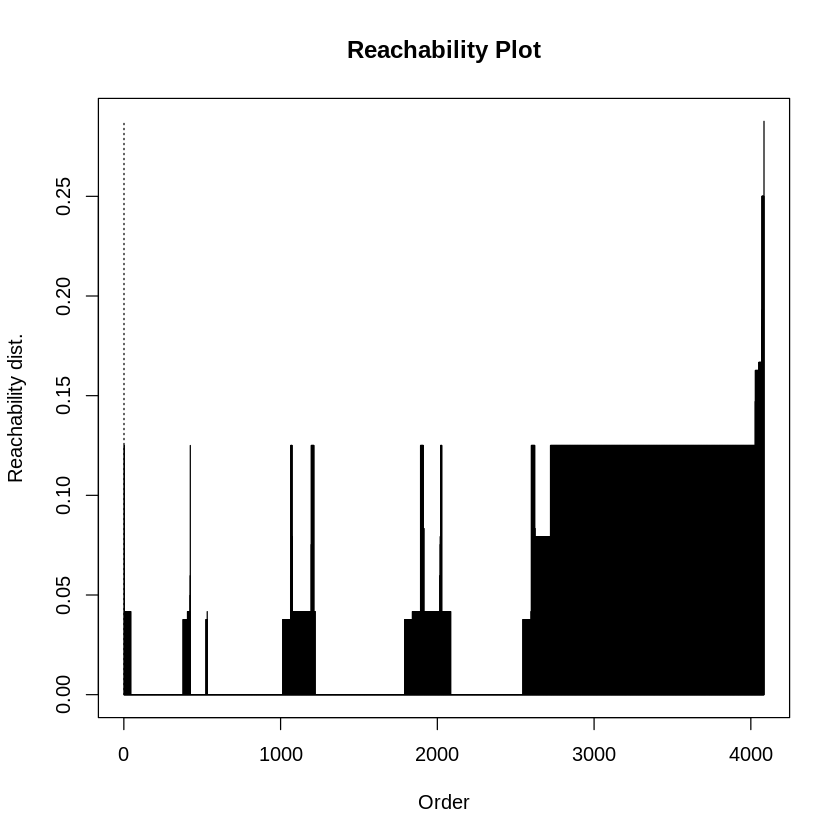

In [69]:
########################
# Density-base methods # 
########################

library("dbscan")
(res_col <- optics(gower_dist, eps=50, minPts = 100))
plot(res_col)


In [70]:
(res_col_d <- extractDBSCAN(res_col, eps_cl=0.1)) #6 Cluster, 961 noise points
(res_col_h <- extractXi(res_col, xi=0.1)) #14 Cluster, 0 noise points
res_col_h$clusters_xi

OPTICS ordering/clustering for 4084 objects.
Parameters: minPts = 100, eps = 50, eps_cl = 0.1, xi = NA
The clustering contains 7 cluster(s) and 1434 noise points.

   0    1    2    3    4    5    6    7 
1434  421  641  123  681  111  572  101 

Available fields: order, reachdist, coredist, predecessor, minPts, eps,
                  eps_cl, xi, cluster

OPTICS ordering/clustering for 4084 objects.
Parameters: minPts = 100, eps = 50, eps_cl = NA, xi = 0.1
The clustering contains 9 cluster(s) and 1 noise points.

Available fields: order, reachdist, coredist, predecessor, minPts, eps,
                  eps_cl, xi, clusters_xi, cluster

start,end,cluster_id
1,423,1
1,4083,2
424,524,3
424,1064,4
532,1064,5
1073,1196,6
1212,1892,7
1910,2020,8
2028,2599,9


In [71]:
# examine results in each class
db_1 <-  which(res_col_d$cluster %in% c(0))
db_2 <-  which(res_col_d$cluster %in% c(1))
db_3 <-  which(res_col_d$cluster %in% c(2))
db_4 <-  which(res_col_d$cluster %in% c(3))
db_5 <-  which(res_col_d$cluster %in% c(4))
db_6 <-  which(res_col_d$cluster %in% c(5))
db_7 <-  which(res_col_d$cluster %in% c(6))
db_8 <-  which(res_col_d$cluster %in% c(7))
db_9 <-  which(res_col_d$cluster %in% c(8))
b[db_1,]
b[db_2,]
b[db_3,]
b[db_4,]
b[db_5,]
b[db_6,]
b[db_7,]
b[db_8,]
b[db_9,]

,Accident_Severity,Date,Day_of_Week,Number_of_Casualties,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Weather_Conditions
1,3,Winter,Weekend,1,Dry,Single carriageway,None,30,Fine
2,3,Winter,Weekend,1,Dry,Single carriageway,None,30,Fine
3,3,Winter,Weekend,1,Dry,Single carriageway,None,30,Fine
4,3,Winter,Weekend,3,Wet or damp,One way street,None,30,Bad
5,3,Winter,Weekday,1,Dry,Dual carriageway,None,30,Fine
6,2,Winter,Weekday,1,Dry,Roundabout,None,30,Fine
8,2,Winter,Weekday,1,Wet or damp,One way street,None,30,Bad
9,2,Winter,Weekday,1,Wet or damp,Single carriageway,None,30,Bad
10,3,Winter,Weekday,1,Wet or damp,Single carriageway,None,20,Bad
12,3,Winter,Weekend,1,Dry,Single carriageway,None,30,Fine


,Accident_Severity,Date,Day_of_Week,Number_of_Casualties,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Weather_Conditions
7,2,Winter,Weekday,1,Dry,Single carriageway,None,30,Fine
11,3,Winter,Weekday,1,Dry,Single carriageway,None,30,Fine
13,3,Winter,Weekday,1,Dry,Single carriageway,None,30,Fine
19,3,Winter,Weekday,1,Dry,Single carriageway,None,30,Fine
23,3,Winter,Weekday,1,Dry,Single carriageway,None,30,Fine
25,3,Winter,Weekday,1,Dry,Single carriageway,None,30,Fine
26,3,Winter,Weekday,1,Dry,Single carriageway,None,30,Fine
28,3,Winter,Weekday,1,Dry,Single carriageway,None,30,Fine
29,3,Winter,Weekday,1,Dry,Single carriageway,None,30,Fine
31,3,Winter,Weekday,1,Dry,Single carriageway,None,30,Fine


,Accident_Severity,Date,Day_of_Week,Number_of_Casualties,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Weather_Conditions
187,2,Autumn,Weekday,1,Dry,Single carriageway,None,30,Fine
188,3,Autumn,Weekday,1,Dry,Single carriageway,None,30,Fine
189,3,Autumn,Weekday,1,Dry,Single carriageway,None,30,Fine
190,3,Autumn,Weekday,1,Dry,Single carriageway,None,30,Fine
191,3,Autumn,Weekday,1,Dry,Single carriageway,None,30,Fine
195,3,Autumn,Weekday,1,Dry,Single carriageway,None,30,Fine
196,3,Autumn,Weekday,1,Dry,Single carriageway,None,30,Fine
197,3,Autumn,Weekday,1,Dry,Single carriageway,None,30,Fine
198,3,Autumn,Weekday,1,Dry,Single carriageway,None,30,Fine
199,3,Autumn,Weekday,1,Dry,Single carriageway,None,30,Fine


,Accident_Severity,Date,Day_of_Week,Number_of_Casualties,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Weather_Conditions
193,3,Autumn,Weekday,1,Dry,Dual carriageway,None,30,Fine
194,3,Autumn,Weekday,1,Dry,Dual carriageway,None,30,Fine
205,3,Autumn,Weekday,1,Dry,Dual carriageway,None,30,Fine
206,2,Autumn,Weekday,1,Dry,Dual carriageway,None,30,Fine
209,3,Autumn,Weekday,1,Dry,Dual carriageway,None,30,Fine
211,3,Autumn,Weekday,2,Dry,Dual carriageway,None,30,Fine
213,3,Autumn,Weekday,1,Dry,Dual carriageway,None,30,Fine
229,3,Autumn,Weekday,1,Dry,Dual carriageway,None,30,Fine
230,2,Autumn,Weekday,1,Dry,Dual carriageway,None,30,Fine
231,3,Autumn,Weekday,1,Dry,Dual carriageway,None,30,Fine


,Accident_Severity,Date,Day_of_Week,Number_of_Casualties,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Weather_Conditions
100,3,Summer,Weekday,1,Dry,Single carriageway,None,30,Fine
101,3,Summer,Weekday,1,Dry,Single carriageway,None,30,Fine
103,2,Summer,Weekday,2,Dry,Single carriageway,None,30,Fine
105,3,Summer,Weekday,1,Dry,Single carriageway,None,30,Fine
109,3,Summer,Weekday,1,Dry,Single carriageway,None,30,Fine
114,3,Summer,Weekday,1,Dry,Single carriageway,None,30,Fine
118,3,Summer,Weekday,1,Dry,Single carriageway,None,30,Fine
120,3,Summer,Weekday,1,Dry,Single carriageway,None,30,Fine
121,2,Summer,Weekday,1,Dry,Single carriageway,None,30,Fine
123,3,Summer,Weekday,2,Dry,Single carriageway,None,30,Fine


,Accident_Severity,Date,Day_of_Week,Number_of_Casualties,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Weather_Conditions
102,3,Summer,Weekday,1,Dry,Dual carriageway,None,30,Fine
108,3,Summer,Weekday,4,Dry,Dual carriageway,None,30,Fine
111,3,Summer,Weekday,2,Dry,Dual carriageway,None,30,Fine
136,3,Summer,Weekday,2,Dry,Dual carriageway,None,30,Fine
138,3,Summer,Weekday,1,Dry,Dual carriageway,None,30,Fine
140,3,Summer,Weekday,1,Dry,Dual carriageway,None,30,Fine
149,3,Summer,Weekday,1,Dry,Dual carriageway,None,30,Fine
160,3,Summer,Weekday,2,Dry,Dual carriageway,None,30,Fine
165,3,Summer,Weekday,1,Dry,Dual carriageway,None,30,Fine
167,3,Summer,Weekday,1,Dry,Dual carriageway,None,30,Fine


,Accident_Severity,Date,Day_of_Week,Number_of_Casualties,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Weather_Conditions
40,2,Spring,Weekday,1,Dry,Single carriageway,None,30,Fine
41,3,Spring,Weekday,1,Dry,Single carriageway,None,30,Fine
42,3,Spring,Weekday,2,Dry,Single carriageway,None,30,Fine
44,3,Spring,Weekday,1,Dry,Single carriageway,None,30,Fine
45,3,Spring,Weekday,1,Dry,Single carriageway,None,30,Fine
48,3,Spring,Weekday,1,Dry,Single carriageway,None,30,Fine
52,3,Spring,Weekday,1,Dry,Single carriageway,None,30,Fine
66,3,Spring,Weekday,1,Dry,Single carriageway,None,30,Fine
67,3,Spring,Weekday,2,Dry,Single carriageway,None,30,Fine
68,3,Spring,Weekday,1,Dry,Single carriageway,None,30,Fine


,Accident_Severity,Date,Day_of_Week,Number_of_Casualties,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Weather_Conditions
46,3,Spring,Weekday,1,Dry,Dual carriageway,None,30,Fine
47,3,Spring,Weekday,1,Dry,Dual carriageway,None,30,Fine
51,3,Spring,Weekday,1,Dry,Dual carriageway,None,30,Fine
53,3,Spring,Weekday,1,Dry,Dual carriageway,None,30,Fine
55,2,Spring,Weekday,1,Dry,Dual carriageway,None,30,Fine
57,3,Spring,Weekday,1,Dry,Dual carriageway,None,30,Fine
59,3,Spring,Weekday,1,Dry,Dual carriageway,None,30,Fine
60,3,Spring,Weekday,1,Dry,Dual carriageway,None,30,Fine
64,3,Spring,Weekday,1,Dry,Dual carriageway,None,30,Fine
80,3,Spring,Weekday,1,Dry,Dual carriageway,None,30,Fine


Accident_Severity,Date,Day_of_Week,Number_of_Casualties,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Weather_Conditions
